In [19]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [25]:
import nltk
from nltk.tokenize import word_tokenize
file = open('article.txt', 'r')
text = file.read()
file.close()
tokens = word_tokenize(text)

print("Liczba słów po tokenizacji: ", len(tokens))

Liczba słów po tokenizacji:  925


In [80]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
print("Liczba słów po usunięciu stop words: ", len(filtered_tokens))

#Deleting punctuation
custom_stop_words = ["'s",'Mr','.', ',', '(', ')', "'", '"', '“', '”', '–', '—', '…', '``', "''", "&", "’", "‘", "''", "``", ":"]
stop_words.update(custom_stop_words)
filtered_tokens = [token for token in filtered_tokens if token not in custom_stop_words]
print("Liczba słów po usunięciu znaków interpunkcyjnych: ", len(filtered_tokens))





Liczba słów po usunięciu stop words:  591
Liczba słów po usunięciu znaków interpunkcyjnych:  459


In [81]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Lematyzacja dokumentu
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

# Liczba słów po lematyzacji
lemmatized_word_count = len(lemmatized_tokens)

print("Liczba słów po lematyzacji:", lemmatized_word_count)
print(filtered_tokens)
print("said" in filtered_tokens)



Liczba słów po lematyzacji: 459
['Tessa', 'Wong', 'Hiroshima', 'Oliver', 'Slow', 'Samuel', 'Horti', 'London', 'BBC', 'News', 'defiant', 'Volodymyr', 'Zelensky', 'insisted', 'Bakhmut', 'occupied', 'Russia', 'Moscow-backed', 'mercenary', 'group', 'claimed', 'control', 'Ukraine', 'president', 'speaking', 'scene-stealing', 'visit', 'Hiroshima', 'Japan', 'G7', 'summit', 'compared', 'Bakhmut', 'Hiroshima', 'hit', 'atomic', 'bomb', 'World', 'War', 'Two', 'promising', 'similar', 'reconstruction', 'country', 'Wagner', 'founder', 'Yevgeny', 'Prigozhin', 'earlier', 'claimed', 'victory', 'Bakhmut', 'press', 'conference', 'final', 'day', 'Summit', 'Zelensky', 'refused', 'provide', 'precise', 'details', 'said', 'city', 'occupied', 'Russia', 'today', 'two', 'three', 'interpretations', 'words', 'said', 'earlier', 'confusion', 'remarks', 'status', 'city', 'arrived', 'Japan', 'great', 'fanfare', 'Saturday', 'next', 'day', 'Zelensky', 'visited', 'Hiroshima', 'Peace', 'Memorial', 'Park', 'Japanese', 'Prim

In [85]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Stemming dokumentu
stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
print(len(stemmed_tokens))


459


[('bakhmut', 13), ('zelenski', 10), ('ukrain', 10), ('said', 10), ('citi', 10), ('hiroshima', 8), ('russia', 7), ('summit', 7), ('wagner', 5), ('prigozhin', 5)]


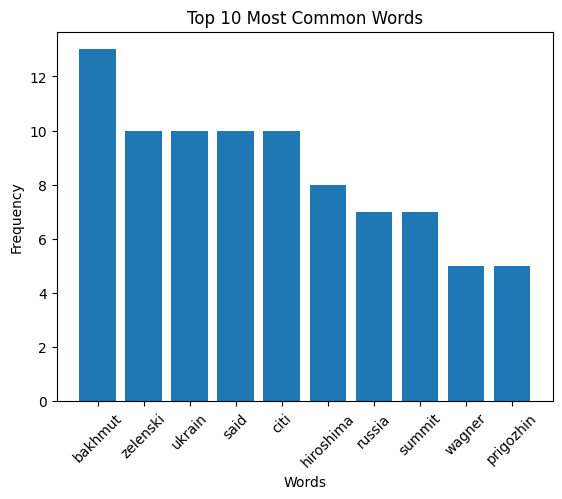

In [86]:
import nltk
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

freq_dist = FreqDist(stemmed_tokens)
most_common_10 = freq_dist.most_common(10)
print(most_common_10)

words, frequencies = zip(*most_common_10)

plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)

# Display the chart
plt.show()


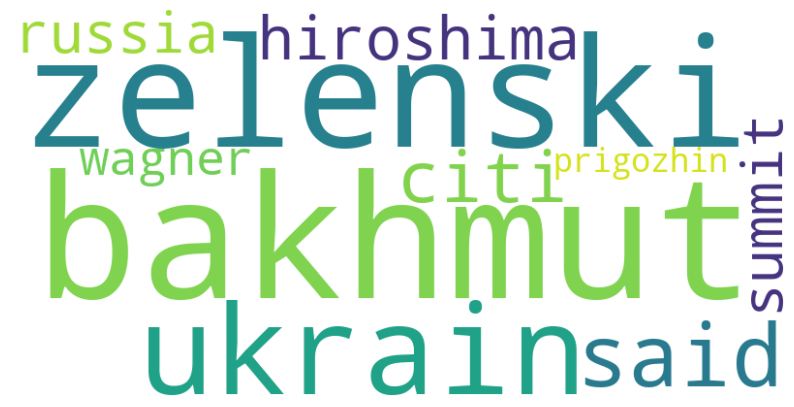

: 

In [87]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = most_common_10

wordcloud = WordCloud(width=800, height=400, background_color='white')

wordcloud.generate_from_frequencies(dict(data))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


bibliography:
https://www.bbc.com/news/world-europe-65662563